Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [85]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [86]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

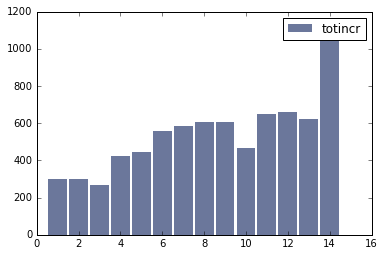

In [87]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

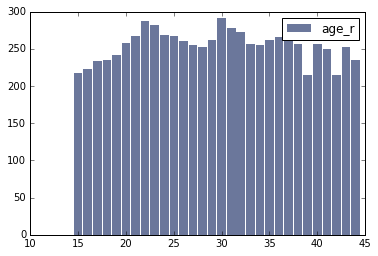

In [88]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

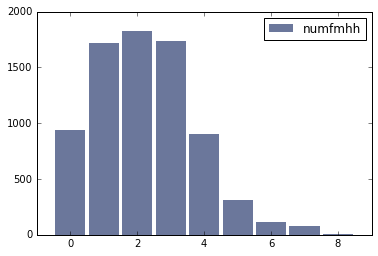

In [89]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Show()

Two is the mode number of people in the respondent's household, and this distribution is fairly symmetrical for values between zero and four.  The tail extends more to the right because a family size cannot be less than zero.

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

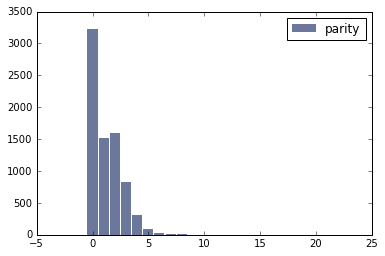

In [90]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show()

Zero is the mode number of children the respondent has borne, having roughly twice the number of occurences as the next most common response.  It decreases from there in an exponential-esque way, except for an increase from one child to two children, with the extreme values of 16 and 22 children having one response each.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [91]:
hist.Largest(5)

[(22, 1), (16, 1), (10, 3), (9, 2), (8, 8)]

As mentioned above, there was 1 response each of 16 and 22 children.  Additionally, there were 3 responses of 10 children, 2 responses of 9 children, and 8 responses of 8 children.

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

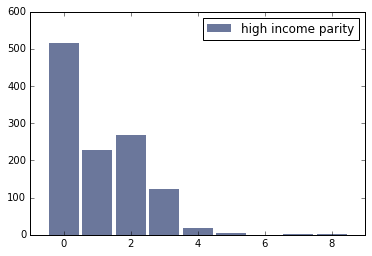

In [92]:
hist = thinkstats2.Hist(resp[resp.totincr == 14].parity)  # 14 is the code for the highest reported income group
thinkplot.Hist(hist, label='high income parity')
thinkplot.Show()

Looking at just the high income respondents, the same general trends are seen.  Zero children is the most common response, there is an increase from one child to two children, and it decreases significantly from there.  The extreme values are lower: one response each of 7 and 8 children.

Find the largest parities for high income respondents.

In [93]:
hist.Largest(5)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123)]

There was 1 response of 8 children, 1 response of 7 children, 5 responses of 5 children, 19 responses of 4 children, and 123 responses of 3 children.

Compare the mean <tt>parity</tt> for high income respondents and others.

In [94]:
print 'high income:\t', resp[resp.totincr == 14].parity.mean()
print 'others:\t\t', resp[resp.totincr != 14].parity.mean()

high income:	1.07586206897
others:		1.24957581367


For high income respondents, the mean parity was 1.076 children.  For others, it was 1.250 children.  It appears that those with high income have fewer children, but the difference is fairly small in the grand scheme of things.

Investigate any other variables that look interesting.

In [95]:
print 'mean interview length:', resp.intvlngth.mean(), 'minutes'

print 'mean number of children 1st husband had from previous relationship:', 
print resp.numkdshx[resp.numkdshx != 99].mean(),  # 99 codes for "don't know"
print 'children'

mean interview length: 82.7555576533 minutes
mean number of children 1st husband had from previous relationship: 1.80706921944 children


### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [96]:
import math
import nsfg
df = nsfg.ReadFemPreg()

firsts = df[df.birthord == 1]
others = df[df.birthord > 1]

def CohenEffectSize(group1, group2):
    """
    Compute Cohen’s d, from ThinkStats Chapter 2
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [97]:
print 'mean weight of first babies:\t', firsts.totalwgt_lb.mean(), 'lbs'
print 'mean weight of other babies:\t', others.totalwgt_lb.mean(), 'lbs'
print 'Cohen\'s d:\t\t\t', CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

mean weight of first babies:	7.20109443044 lbs
mean weight of other babies:	7.32585561497 lbs
Cohen's d:			-0.0886729270726


In [98]:
print 'mean pregnancy length of first babies:\t', firsts.prglngth.mean(), 'weeks'
print 'mean pregnancy length of other babies:\t', others.prglngth.mean(), 'weeks'
print 'Cohen\'s d:\t\t\t\t', CohenEffectSize(firsts.prglngth, others.prglngth)

mean pregnancy length of first babies:	38.6009517335 weeks
mean pregnancy length of other babies:	38.5229144667 weeks
Cohen's d:				0.0288790446544


For pregnancy length, Cohen's _d_ is 0.029 standard deviations.  For weight, it is -0.089 standard deviations.  So, there is more of a difference in weight between first children and others, but it is still a relatively small difference overall.